In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [9]:
df = pd.read_csv("long_run_varying_flows_labelled.csv")
print(df.shape)
drop_cols = ["Timestamp_IST", "State"]
df = df.drop(columns=drop_cols)


(86400, 50)


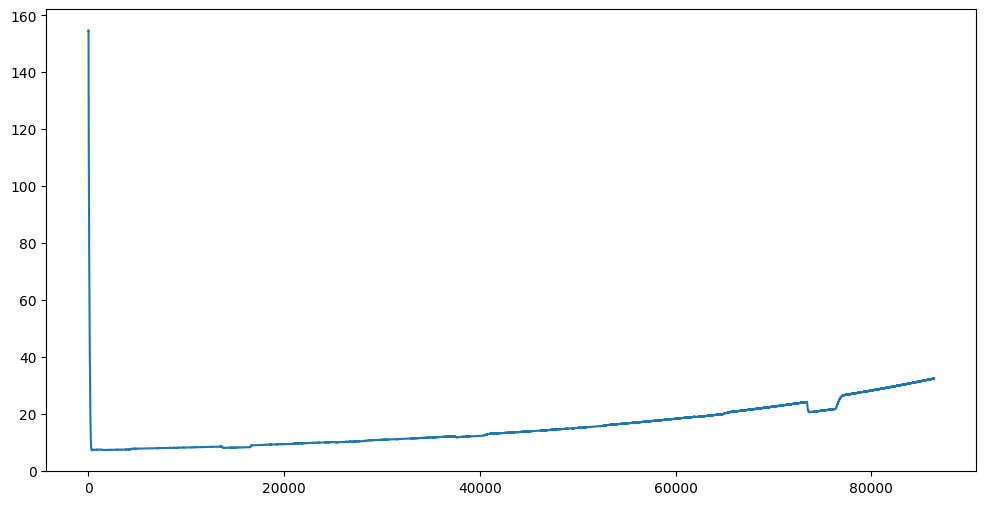

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df['S1-PT-1001A'], label='S1-PT-1001A')

In [19]:
csv_1 = pd.read_csv(r"C:\Users\adith\AppData\Local\Temp\5c4a1605-e71e-4f33-8c31-d281f3c4bdb0_Emerson_app.zip.db0\GlitchDetect\PCA\varying_flows.csv")

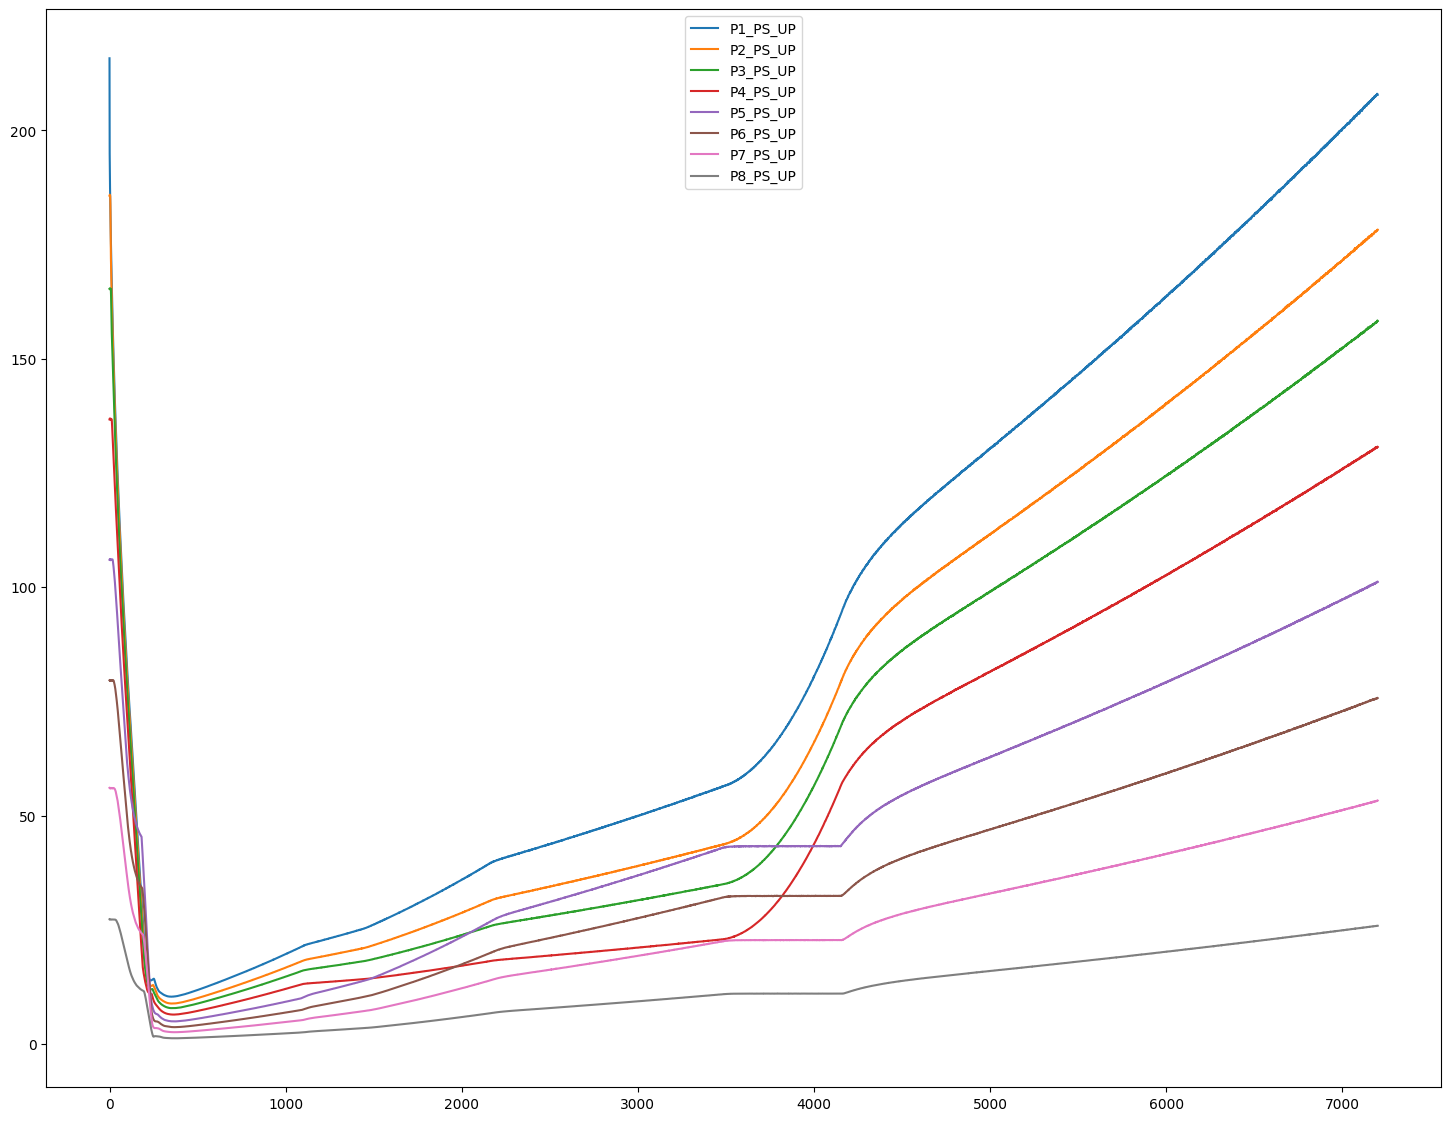

In [31]:
plt.figure(figsize=(18, 14))
for i in range(1, 9):
    plt.plot(csv_1[f'P{i}_PS_UP'], label=f'P{i}_PS_UP')

plt.legend()
plt.show()

In [32]:
lr = pd.read_csv('F:\MultiDimensionalAD\data\long_run_labelled.csv')


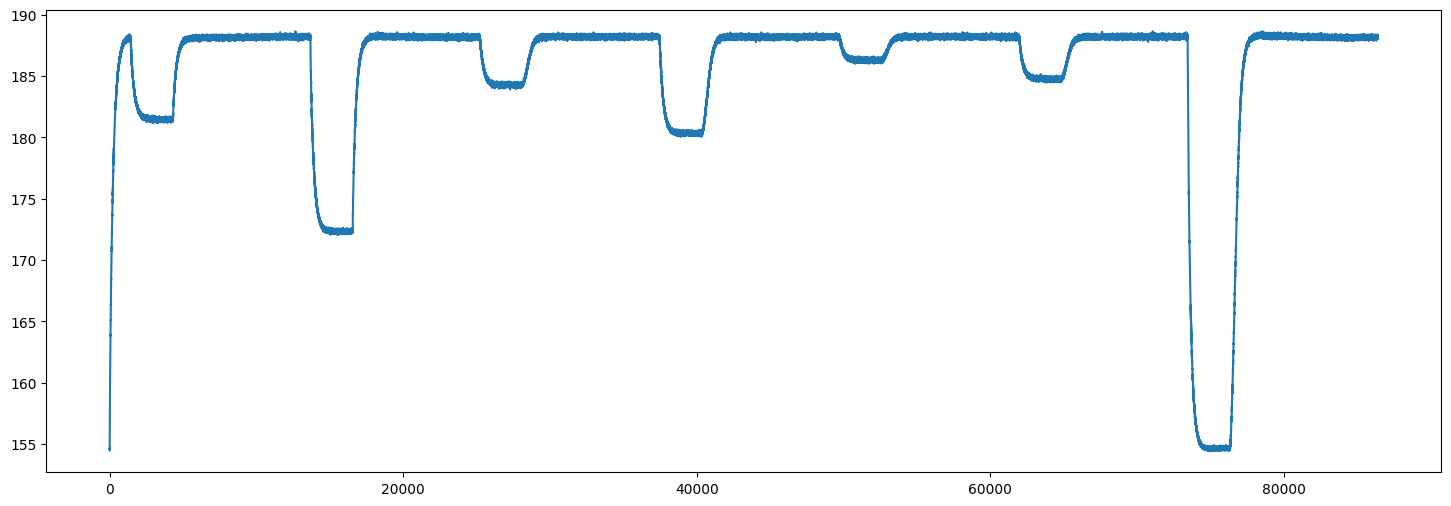

In [33]:
plt.figure(figsize=(18, 6))
plt.plot(lr['S1-PT-1001A'])

In [10]:
le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

X = df.drop(columns=["label", "label_encoded"])
y = df["label_encoded"]

print("All classes:", le.classes_)


All classes: ['10pct0' '2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250'
 'no_fault']


In [11]:
split_idx = int(0.8 * len(df))

X_train = X.iloc[:split_idx]
X_test  = X.iloc[split_idx:]

y_train = y.iloc[:split_idx]
y_test  = y.iloc[split_idx:]


In [12]:
print("Train classes:", le.inverse_transform(np.unique(y_train)))
print("Test classes :", le.inverse_transform(np.unique(y_test)))


Train classes: ['2pct0' '2pct130' '2pct250' '4pct0' '4pct130' '4pct250' 'no_fault']
Test classes : ['10pct0' 'no_fault']


In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [14]:
pca = PCA(n_components=3, random_state=42)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca  = pca.transform(X_test_scaled)


In [15]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.cumsum())


Explained variance ratio: [0.62594804 0.19965307 0.06570283]
Cumulative variance: [0.62594804 0.82560112 0.89130395]


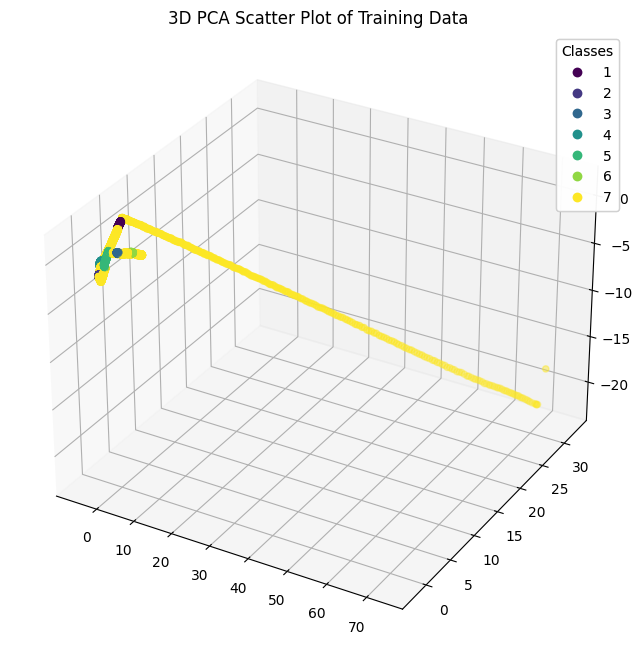

In [16]:
# plot 3d PCA scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis', s=20)
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)
ax.set_title("3D PCA Scatter Plot of Training Data")
plt.show()